In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from ae.attacks import *
from ae.load_mnist import load_mnist_data
from ae.models import ResNet

def visualize_digit(data):
    """
    Visualizes a digit.

    Args:
        data (torch.Tensor): A tensor in the shape (1, 28, 28), representing data of a digit
    """
    np_data = data[0, ...].detach().cpu().numpy()
    plt.imshow(np_data, origin='upper')
    plt.show()

def softmax_prediction(network, features):
    out = network(features)
    return torch.argmax(out, dim=-1)

def calculate_out(network, feature, p_feature, label):
    pred = softmax_prediction(network, feature)[0]
    p_pred = softmax_prediction(network, p_feature)[0]
    plt.title(f"Feature with label: {label[0]}. Predicted digit: {pred}")
    visualize_digit(feature[0])
    plt.title(f"Perturbed feature with label: {label[0]}. Predicted digit: {p_pred} ")
    visualize_digit(p_feature[0])

_, features, _, labels = load_mnist_data(10, 0, 300)
network = ResNet()
network.load_state_dict(torch.load("resnet.pth"))
loss = torch.nn.NLLLoss

## Implementations of adversarial attacks on ResNet for MNIST

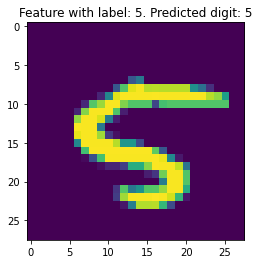

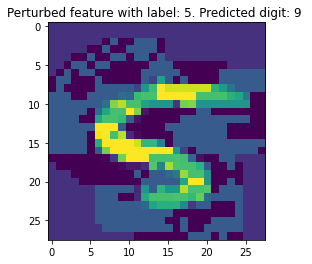

In [10]:
fgs = FastGraidentSign(network, loss, .2)
idx = np.random.randint(features.size(0))
feature, label = features[idx:idx+1, ...], labels[idx:idx+1, ...]
p_feature = fgs.perturb(feature, label)
calculate_out(network, feature, p_feature, label)

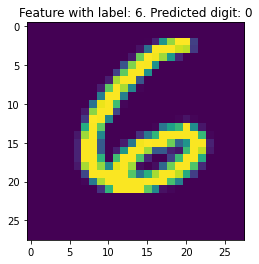

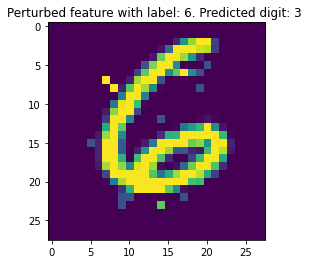

In [5]:
sma = SaliencyAttack(network, 20, .25, 10)
idx = np.random.randint(features.size(0))
feature, label = features[idx:idx+1, ...], labels[idx:idx+1, ...]
p_feature = sma.perturb(feature, 3)
network.to('cpu')
p_feature = p_feature.to('cpu')
calculate_out(network, feature, p_feature, label)